<a href="https://colab.research.google.com/github/Sanjay7231/Machine_learning_CH.SC.U4CSE23251/blob/Lab-Experiments/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

In [ ]:
data = pd.read_csv('diabetes.csv', header=0, names=col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,0.723127,2.860984,-1.267664,2.164558,0.490688,-1.937556,-0.061188,-0.464875,1
1,1.363714,2.796448,-1.494511,1.272568,-2.813702,-0.705287,-0.107995,-1.135215,1
2,-1.109157,-0.543751,-0.752602,-1.371625,-0.465103,1.021344,-1.722343,1.213309,0
3,-0.377742,-0.549542,-1.486105,-1.051194,2.181089,1.125120,-0.239592,1.722871,1
4,-1.468547,-1.648172,-0.935549,-0.178589,1.631696,1.853047,-0.411471,2.546601,1


In [ ]:
feature_cols = ['pregnant','glucose','bp','skin','insulin',
                'bmi','pedigree','age']
x = data[feature_cols].apply(pd.to_numeric, errors='coerce')
y = data.label.apply(pd.to_numeric, errors='coerce')

data_cleaned = pd.concat([x, y], axis=1).dropna()

x_cleaned = data_cleaned[feature_cols]
y_cleaned = data_cleaned.label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_cleaned, y_cleaned, test_size=0.2, random_state=5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred: ', y_pred)

y_pred:  [0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 0]


In [ ]:
print(x_train.info())
non_numeric_pregnant = x_train[pd.to_numeric(x_train['pregnant'], errors='coerce').isna()]['pregnant'].unique()
print("Unique non-numeric values in 'pregnant' column:", non_numeric_pregnant)

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 140 to 206
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  615 non-null    object
 1   glucose   615 non-null    object
 2   bp        615 non-null    object
 3   skin      615 non-null    object
 4   insulin   615 non-null    object
 5   bmi       615 non-null    object
 6   pedigree  615 non-null    object
 7   age       615 non-null    object
dtypes: object(8)
memory usage: 43.2+ KB
None
Unique non-numeric values in 'pregnant' column: ['pregnant']


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy_score)
print('Accuracy in Percentage : ', int(accuracy_score*100), '%')

Confusion Matrix :  [[64 13]
 [ 6 71]]
Accuracy Score :  0.8766233766233766
Accuracy in Percentage :  87 %


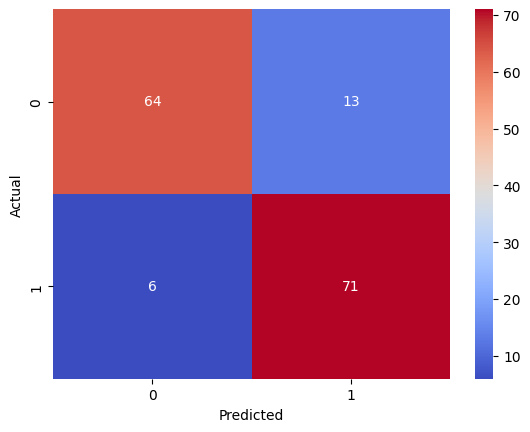

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'],
                       colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.show()

In a classification tree, the data set splits according to its variables. In this scenario, you have two variables, age and income, determining whether someone buys a house. If training data tells us that 70 percent of people over age 30 bought a house, then the data gets split there, with age becoming the first node in the tree. This split makes the data 80 percent "pure." The second node then addresses income from there.

In [ ]:
uploaded = files.upload()

Saving house_buying.csv to house_buying.csv


In [ ]:
col_names = ['age', 'income', 'buy_house']
data = pd.read_csv('house_buying.csv', names=col_names, header=0)
print(data.shape)
data.head()

(50, 3)


,age,income,buy_house
0,60,Low,1
1,37,Low,1
2,26,High,0
3,54,Low,1
4,22,Low,1


In [ ]:
feature_cols = ['age','income']
x = data[feature_cols]
y = data.buy_house

# Convert 'income' column to categorical and then apply one-hot encoding
x = pd.get_dummies(x, columns=['income'], drop_first=False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40, 4) (40,)
(10, 4) (10,)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred: ', y_pred)

y_pred:  [0 0 1 1 1 1 0 1 1 0]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy_score)
print('Accuracy in Percentage : ', int(accuracy_score*100), '%')

Confusion Matrix :  [[3 3]
 [1 3]]
Accuracy Score :  0.6
Accuracy in Percentage :  60 %


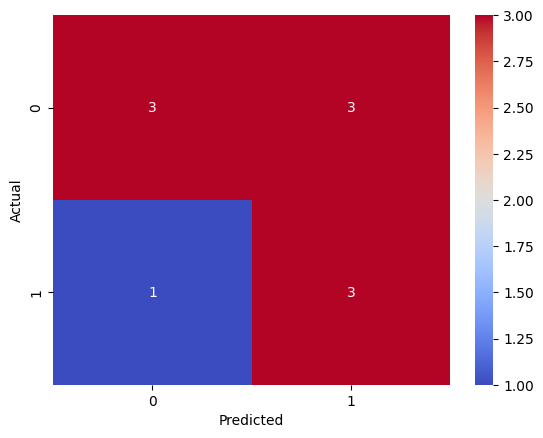

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'],
                       colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.show()

What you do after work in your free time can depend on the weather. If it is sunny, you might choose to picnic with a friend, grab a drink with a colleague, or run errands. If it is raining, you might stay home and watch a movie instead. In this scenario, you have a clear outcome. In this case, that is classified as whether to "go out" or "stay

In [ ]:
uploaded = files.upload()

Saving going_out.csv to going_out.csv


In [ ]:
col_names = ['weather', 'decision']
data = pd.read_csv('going_out.csv', names=col_names, header=0)
print(data.shape)
data.head()

(50, 2)


,weather,decision
Sunny,Errands,Go Out
Sunny,Errands,Go Out
Rainy,Movie,Stay
Rainy,Movie,Stay
Sunny,Picnic,Go Out


In [ ]:
feature_cols = ['weather']
x = data[feature_cols]
y = data.decision

# Convert 'weather' column to categorical and then apply one-hot encoding
x = pd.get_dummies(x, columns=['weather'], drop_first=False)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40, 4) (40,)
(10, 4) (10,)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('y_pred: ', y_pred)

y_pred:  ['Go Out' 'Go Out' 'Stay' 'Stay' 'Go Out' 'Go Out' 'Stay' 'Stay' 'Stay'
 'Stay']


Confusion Matrix :  [[4 0]
 [0 6]]
Accuracy Score :  1.0
Accuracy in Percentage :  100 %


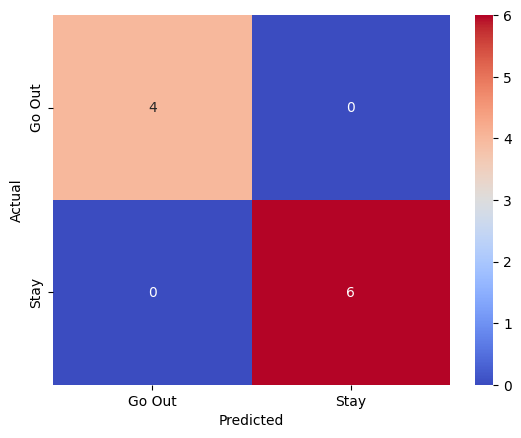

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy_score)
print('Accuracy in Percentage : ', int(accuracy_score*100), '%')

conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'],
                       colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.show()